Vectorize and do topic and sentiment analysis

In [1]:
import pickle
with open('df_4_companies_prep_nostop.pickle', 'rb') as read_file:
    df_4_companies_prep=pickle.load(read_file)

In [2]:
df_4_companies_prep.tail(1)

,article_date,article_link-href,article_title,ticker,article_text_clean,article_text_words,article_words_nostop
1263,"February 19, 2019",http://ir.clovisoncology.com/investors-and-new...,Alkermes and Clovis Oncology Initiate Research...,CLVS,of with and to be in multiple preclinical tumo...,"[of, with, and, to, be, in, multiple, preclini...","[multiple, preclinical, tumor, boulder, alkerm..."


In [3]:
import pandas as pd
import numpy as np
import re
import string
from pprint import pprint
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages")

In [4]:
#first I need to convert the column to string datatype
df_4_companies_prep['article_words_str']=df_4_companies_prep['article_words_nostop'].astype(str)
df_4_companies_prep.head(1)

,article_date,article_link-href,article_title,ticker,article_text_clean,article_text_words,article_words_nostop,article_words_str
0,"Apr 01, 2019",https://www.novartis.com/news/media-releases/n...,Novartis adds clinical and preclinical anti-in...,NVS,acquisition will give one clinical and two pre...,"[acquisition, will, give, one, clinical, and, ...","[acquisition, give, one, clinical, two, precli...","['acquisition', 'give', 'one', 'clinical', 'tw..."


In [7]:
#vectorize with tf-idf. Input the string-converted column. May need to adjust min_df
#last time used min_df=0.02
corpus=df_4_companies_prep['article_words_str']
cv_tfidf = TfidfVectorizer(decode_error='ignore', strip_accents='unicode', min_df=0.02)
X_tfidf = cv_tfidf.fit_transform(corpus).toarray() 
df_4_companies_doc_term=pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())

In [8]:
df_4_companies_doc_term.head(5)

,TM,abdomen,abdominal,able,abnormal,abnormality,abnormally,absence,absolute,abstract,...,worse,worsening,wort,would,yeast,yellowing,yellowish,yet,young,younger
0,0.0,0.0,0.000000,0.041372,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.017309,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.014227,0.000000,0.0,0.0,0.0,0.0,0.0,0.053436,...,0.0,0.04943,0.0,0.0,0.0,0.0,0.0,0.029795,0.000000,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.116088,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.051783,0.235434,0.0


In [9]:
#LSA
#Try Latent Semantic Analysis (LSA) topic modeling. Refer to Topic_Modeling_LSA_NMF notebook from class.
#LSA is just another name for Singular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
#Need to specify the number of topics; I'll start with 20 and tune.
lsa = TruncatedSVD(20)
df_4_companies_doc_topic = lsa.fit_transform(X_tfidf)
lsa.explained_variance_ratio_

array([0.00883293, 0.04638983, 0.04679692, 0.04045129, 0.03679159,
       0.03425261, 0.02988987, 0.02729822, 0.02342206, 0.01763157,
       0.01740851, 0.01671937, 0.01497077, 0.01442574, 0.01313586,
       0.01291616, 0.01212286, 0.01091239, 0.01013693, 0.00967691])

In [10]:
#LSA
#from class notebook. change name of vectorizer, round to 4 decimal places. Make for 5 components (topics).
df_4_companies_word = pd.DataFrame(lsa.components_.round(4),
             index = ["component_1","component_2", "component_3", "component_4", "component_5", 
                      "component_6", "component_7", "component_8", "component_9", "component_10",
                      "component_11", "component_12", "component_13", "component_14", "component_15", 
                     "component_16", "component_17", "component_18", "component_19", "component_20"],
             columns = cv_tfidf.get_feature_names())
df_4_companies_word

,TM,abdomen,abdominal,able,abnormal,abnormality,abnormally,absence,absolute,abstract,...,worse,worsening,wort,would,yeast,yellowing,yellowish,yet,young,younger
component_1,0.0114,0.0058,0.0144,0.0139,0.0138,0.0058,0.0094,0.0083,0.0135,0.0500,...,0.0049,0.0083,0.0049,0.0176,0.0084,0.0064,0.0017,0.0107,0.0164,0.0030
component_2,0.0080,0.0020,-0.0026,-0.0017,-0.0089,0.0017,0.0044,0.0031,-0.0021,-0.0533,...,0.0001,-0.0027,0.0033,0.0020,0.0207,0.0007,0.0041,-0.0059,-0.0009,-0.0015
component_3,0.0002,-0.0053,-0.0020,-0.0045,-0.0034,-0.0018,-0.0013,-0.0019,-0.0060,-0.0098,...,-0.0047,-0.0055,-0.0024,0.0029,-0.0224,-0.0019,-0.0044,-0.0005,-0.0050,-0.0002
component_4,0.0039,0.0146,0.0167,-0.0023,0.0110,0.0034,0.0013,0.0005,-0.0003,-0.0147,...,0.0047,0.0031,0.0024,-0.0074,0.0357,0.0050,0.0071,0.0000,0.0008,0.0021
component_5,0.0078,-0.0018,0.0182,0.0045,0.0105,0.0183,0.0375,0.0314,0.0287,-0.0332,...,-0.0012,0.0025,0.0196,0.0059,-0.0074,0.0177,-0.0014,-0.0026,0.0201,0.0020
component_6,0.0076,0.0003,0.0005,0.0001,0.0001,0.0002,0.0002,0.0002,-0.0033,-0.0305,...,-0.0009,-0.0005,0.0002,-0.0018,0.0010,0.0004,0.0002,0.0074,-0.0008,0.0001
component_7,0.0005,-0.0024,-0.0151,0.0104,-0.0024,-0.0069,-0.0150,-0.0119,-0.0228,-0.0354,...,-0.0001,0.0016,-0.0068,0.0299,-0.0027,-0.0066,-0.0006,0.0032,0.0032,-0.0001
component_8,0.0120,-0.0019,0.0068,-0.0074,-0.0101,0.0041,-0.0010,0.0002,0.0145,-0.0091,...,-0.0027,-0.0049,0.0048,-0.0029,0.0043,0.0018,0.0008,-0.0022,-0.0180,0.0005
component_9,-0.0046,-0.0016,-0.0093,-0.0003,-0.0128,-0.0053,-0.0070,-0.0052,-0.0103,-0.0134,...,0.0002,-0.0032,-0.0049,0.0071,0.0121,-0.0070,0.0024,-0.0032,-0.0018,-0.0033
component_10,-0.0233,0.0121,0.0127,-0.0069,0.0295,0.0056,-0.0115,-0.0089,0.0006,0.0007,...,0.0080,0.0169,0.0029,-0.0300,0.0226,0.0081,0.0046,0.0057,-0.0018,0.0020


In [11]:
#LSA
#From notebook
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [12]:
#LSA
display_topics(lsa, cv_tfidf.get_feature_names(), 20)


Topic  0
cancer, treatment, oncology, study, diabetes, clinical, disease, media, people, data, development, phase, psoriasis, blood, regarding, cell, therapy, combination, mobile, migraine

Topic  1
diabetes, conference, call, participate, life, insulin, people, work, replay, incorporated, source, live, financial, type, mark, hern, fireside, chat, audio, eastern

Topic  2
oncology, cancer, conference, call, ovarian, boulder, quarter, replay, live, breast, financial, source, participate, advanced, platinum, simultaneously, audio, presentation, business, diagnostic

Topic  3
diabetes, cancer, insulin, type, blood, breast, cardiovascular, sugar, doctor, heart, ovarian, plus, take, advanced, kidney, combination, metastatic, oncology, side, tell

Topic  4
cystic, fibrosis, mutation, incorporated, protein, gene, cell, defective, surface, genetic, boston, function, doctor, one, serious, top, combination, lung, cause, mass

Topic  5
migraine, headache, episodic, cluster, days, preventive, mon

In [13]:
#NMF 
nmf_model = NMF(20)
df_4_companies_NMF_doc_topic = nmf_model.fit_transform(X_tfidf)

In [14]:
#NMF 
df_4_companies_NMF_topic_word = pd.DataFrame(nmf_model.components_.round(4),
             index = ["component_1","component_2", "component_3", "component_4", "component_5", 
                      "component_6", "component_7", "component_8", "component_9", "component_10",
                      "component_11", "component_12", "component_13", "component_14", "component_15", 
                     "component_16", "component_17", "component_18", "component_19", "component_20"],
             columns = cv_tfidf.get_feature_names())
df_4_companies_NMF_topic_word

,TM,abdomen,abdominal,able,abnormal,abnormality,abnormally,absence,absolute,abstract,...,worse,worsening,wort,would,yeast,yellowing,yellowish,yet,young,younger
component_1,0.0000,0.1323,0.1759,0.0002,0.1901,0.0759,0.0000,0.0000,0.0000,0.0000,...,0.0543,0.0772,0.0642,0.0000,0.2831,0.0995,0.0572,0.0292,0.0000,0.0091
component_2,0.0086,0.0000,0.0000,0.0024,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0007,0.0000,0.0000,0.0000,0.0018,0.0000,0.0000
component_3,0.0132,0.0214,0.0000,0.0058,0.0394,0.0000,0.0203,0.0000,0.0000,0.1837,...,0.0000,0.0041,0.0000,0.0000,0.0000,0.0107,0.0000,0.0203,0.0000,0.0187
component_4,0.0292,0.0083,0.0000,0.0117,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0028,0.0000,0.0000,0.0068,0.0449,0.0000,0.0085,0.0000,0.0135,0.0009
component_5,0.0431,0.0000,0.0405,0.0216,0.0006,0.0454,0.1214,0.1008,0.0844,0.0000,...,0.0000,0.0000,0.0516,0.0242,0.0000,0.0416,0.0000,0.0000,0.0482,0.0065
component_6,0.0183,0.0000,0.0000,0.0031,0.0000,0.0000,0.0000,0.0000,0.0000,0.0081,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0207,0.0000,0.0000
component_7,0.0000,0.0000,0.0000,0.0459,0.0169,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0076,0.0057,0.0000,0.0672,0.0000,0.0000,0.0000,0.0122,0.0000,0.0000
component_8,0.0297,0.0000,0.0000,0.0051,0.0000,0.0040,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0028,0.0052,0.0307,0.0000,0.0036,0.0000,0.0085,0.0000,0.0060
component_9,0.0123,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0010,...,0.0000,0.0000,0.0000,0.0192,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
component_10,0.0000,0.0004,0.0000,0.0000,0.0000,0.0007,0.0000,0.0000,0.0014,0.0000,...,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0026,0.0000,0.0000


In [15]:
#NMF 
display_topics(nmf_model, cv_tfidf.get_feature_names(), 20)


Topic  0
doctor, blood, take, tell, taking, side, away, right, sugar, kidney, provider, effects, skin, cause, liver, pain, low, stomach, swelling, urine

Topic  1
participate, fireside, chat, conference, audio, eastern, replay, hern, mark, work, available, life, president, days, live, presentation, volunteerism, century, man, philanthropy

Topic  2
cancer, breast, advanced, metastatic, plus, endocrine, inhibitor, combination, therapy, survival, oncology, alone, lung, receptor, cell, trial, progression, phase, abstract, positive

Topic  3
diabetes, insulin, type, people, cardiovascular, sugar, percent, disease, care, glucose, make, since, life, health, better, support, collaboration, million, thyroid, work

Topic  4
cystic, fibrosis, mutation, protein, gene, defective, cell, surface, genetic, people, two, function, one, lung, older, cause, test, incorporated, age, combination

Topic  5
migraine, headache, episodic, cluster, days, preventive, monthly, treatment, placebo, study, preventi

In [16]:
#Function to plot top few words in topic based on weights
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

n_samples = 2000
n_features = 1000
n_components = 20
n_top_words = 20
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()




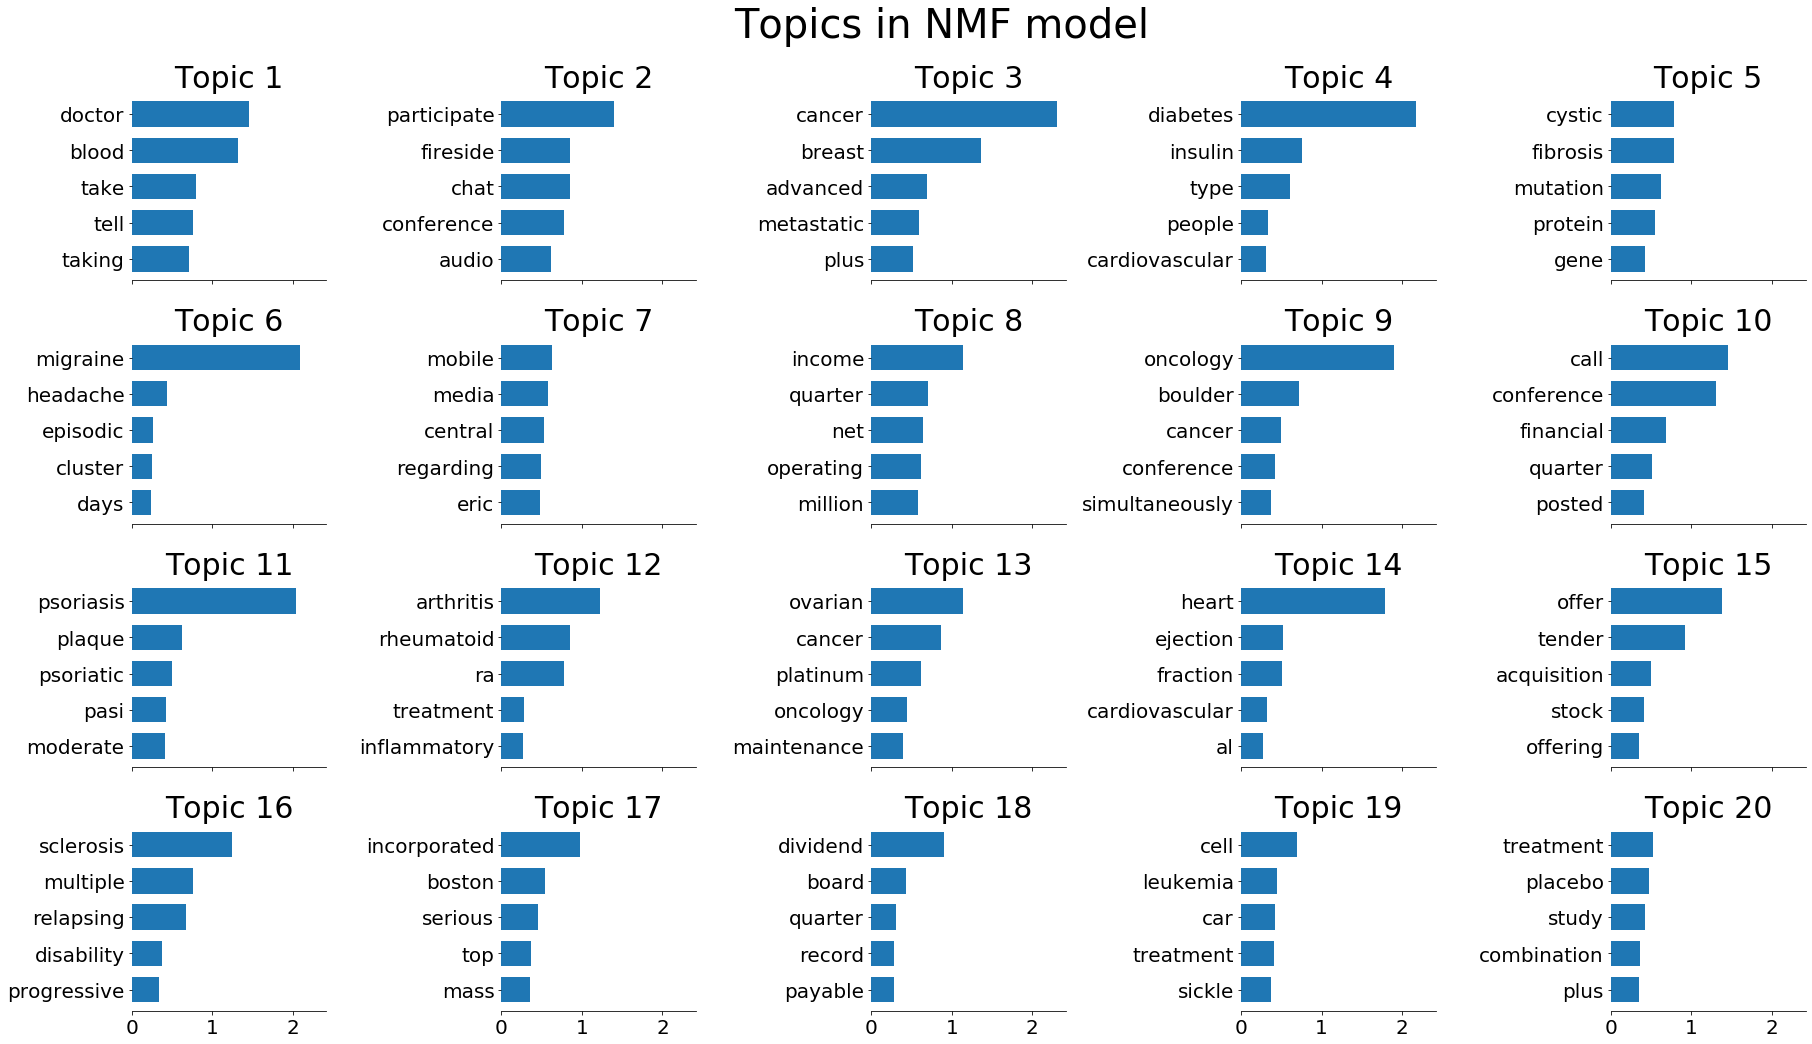

In [17]:
#NMF
n_top_words = 5
tf_feature_names = cv_tfidf.get_feature_names()
plot_top_words(nmf_model, tf_feature_names, n_top_words, 'Topics in NMF model')

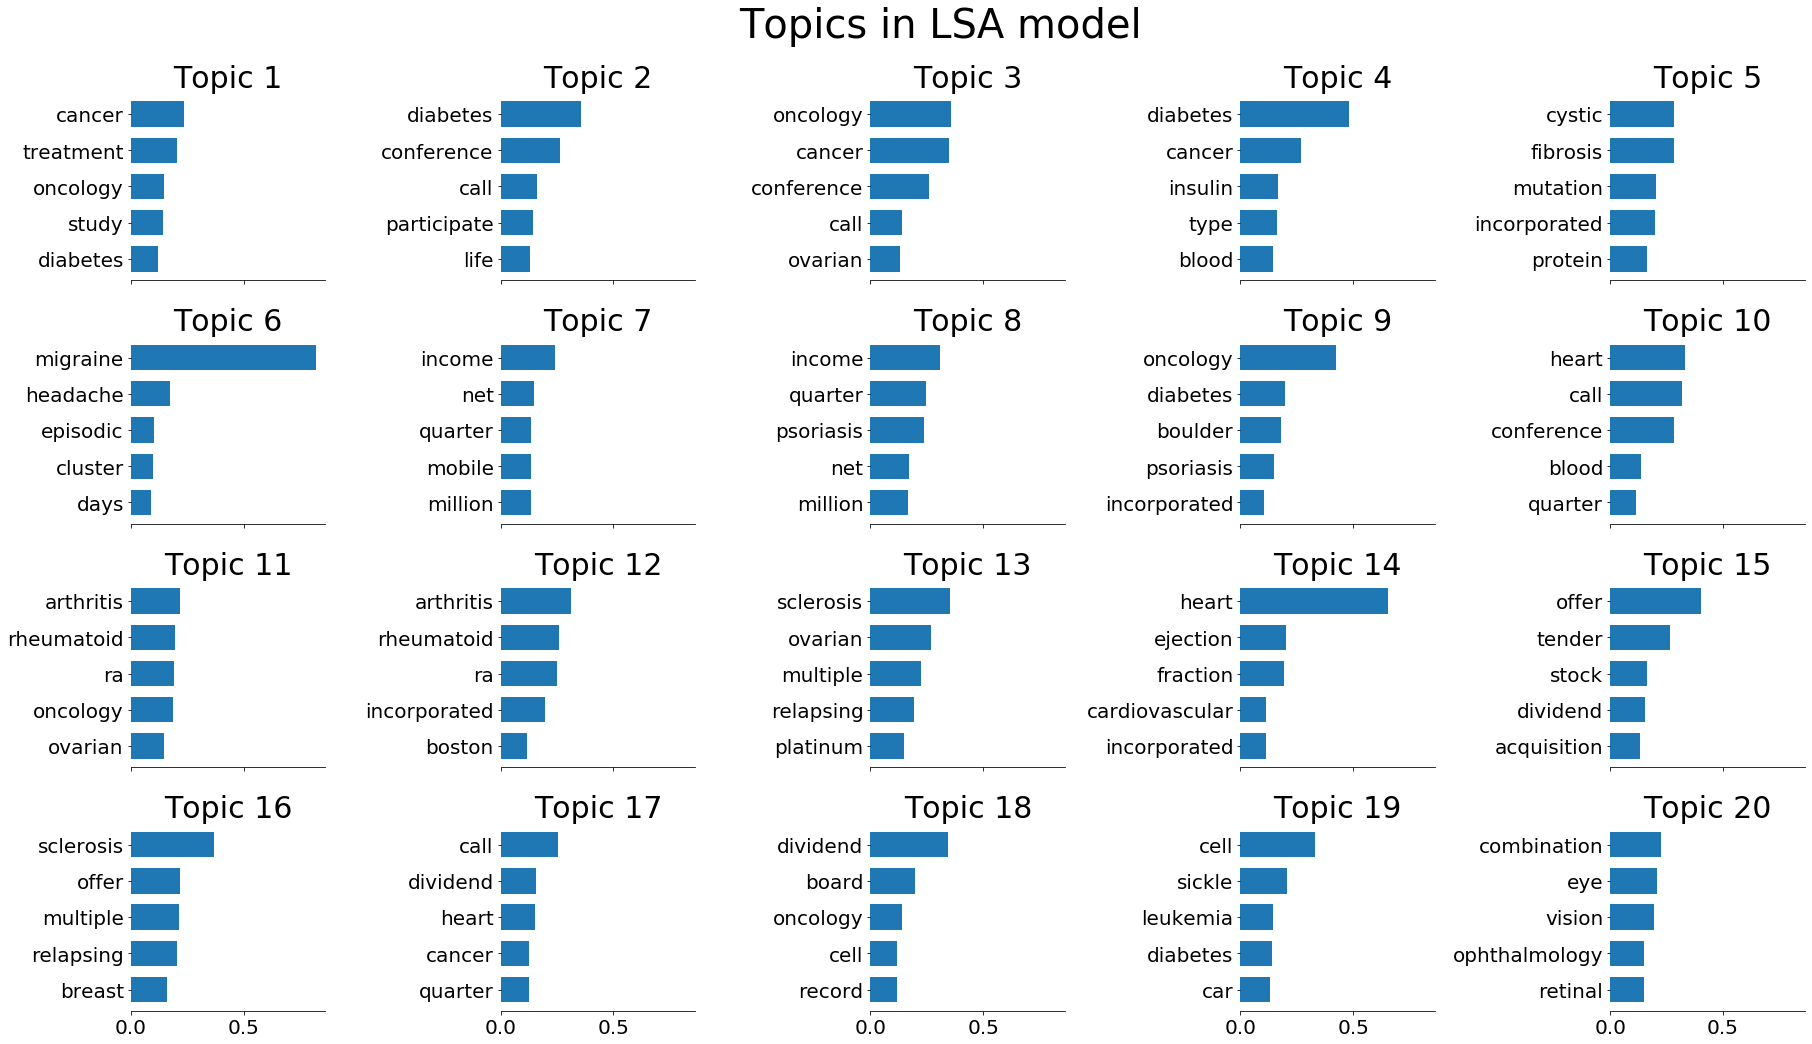

In [18]:
#LSA
n_top_words = 5
tf_feature_names = cv_tfidf.get_feature_names()
plot_top_words(lsa, tf_feature_names, n_top_words, 'Topics in LSA model')

In [36]:
##Edit this to get data to make a word cloud
#Function to plot top few words in topic based on weights
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

n_samples = 2000
n_features = 1000
n_components = 20
n_top_words = 20
def plot_top_words2(model, feature_names, n_top_words, title):
    top_features_list=[]
    weights_list=[]
    fig, axes = plt.subplots(4, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        #print(top_features_ind)
        top_features = [feature_names[i] for i in top_features_ind]
        top_features_list.append(top_features)
        print(top_features)
        print(top_features_list)
        weights = topic[top_features_ind]
        weights_list.append(weights)
        print(weights)
        print(weights_list)

        #ax = axes[topic_idx]
        #ax.barh(top_features, weights, height=0.7)
        #ax.set_title(f'Topic {topic_idx +1}',
         #            fontdict={'fontsize': 30})
        #ax.invert_yaxis()
        #ax.tick_params(axis='both', which='major', labelsize=20)
        #for i in 'top right left'.split():
         #   ax.spines[i].set_visible(False)
        #fig.suptitle(title, fontsize=40)

  #  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
   # plt.show()



['cancer', 'treatment', 'oncology', 'study', 'diabetes', 'clinical', 'disease', 'media', 'people', 'data']
[['cancer', 'treatment', 'oncology', 'study', 'diabetes', 'clinical', 'disease', 'media', 'people', 'data']]
[0.23517341 0.20262145 0.14551103 0.14248696 0.12131326 0.12046625
 0.11924073 0.11617812 0.11400357 0.11371721]
[array([0.23517341, 0.20262145, 0.14551103, 0.14248696, 0.12131326,
       0.12046625, 0.11924073, 0.11617812, 0.11400357, 0.11371721])]
['diabetes', 'conference', 'call', 'participate', 'life', 'insulin', 'people', 'work', 'replay', 'incorporated']
[['cancer', 'treatment', 'oncology', 'study', 'diabetes', 'clinical', 'disease', 'media', 'people', 'data'], ['diabetes', 'conference', 'call', 'participate', 'life', 'insulin', 'people', 'work', 'replay', 'incorporated']]
[0.35848813 0.26158291 0.15967745 0.142879   0.13198099 0.12181463
 0.11960404 0.11794543 0.10813009 0.10742189]
[array([0.23517341, 0.20262145, 0.14551103, 0.14248696, 0.12131326,
       0.12046625

NameError: name 'top_features_list' is not defined

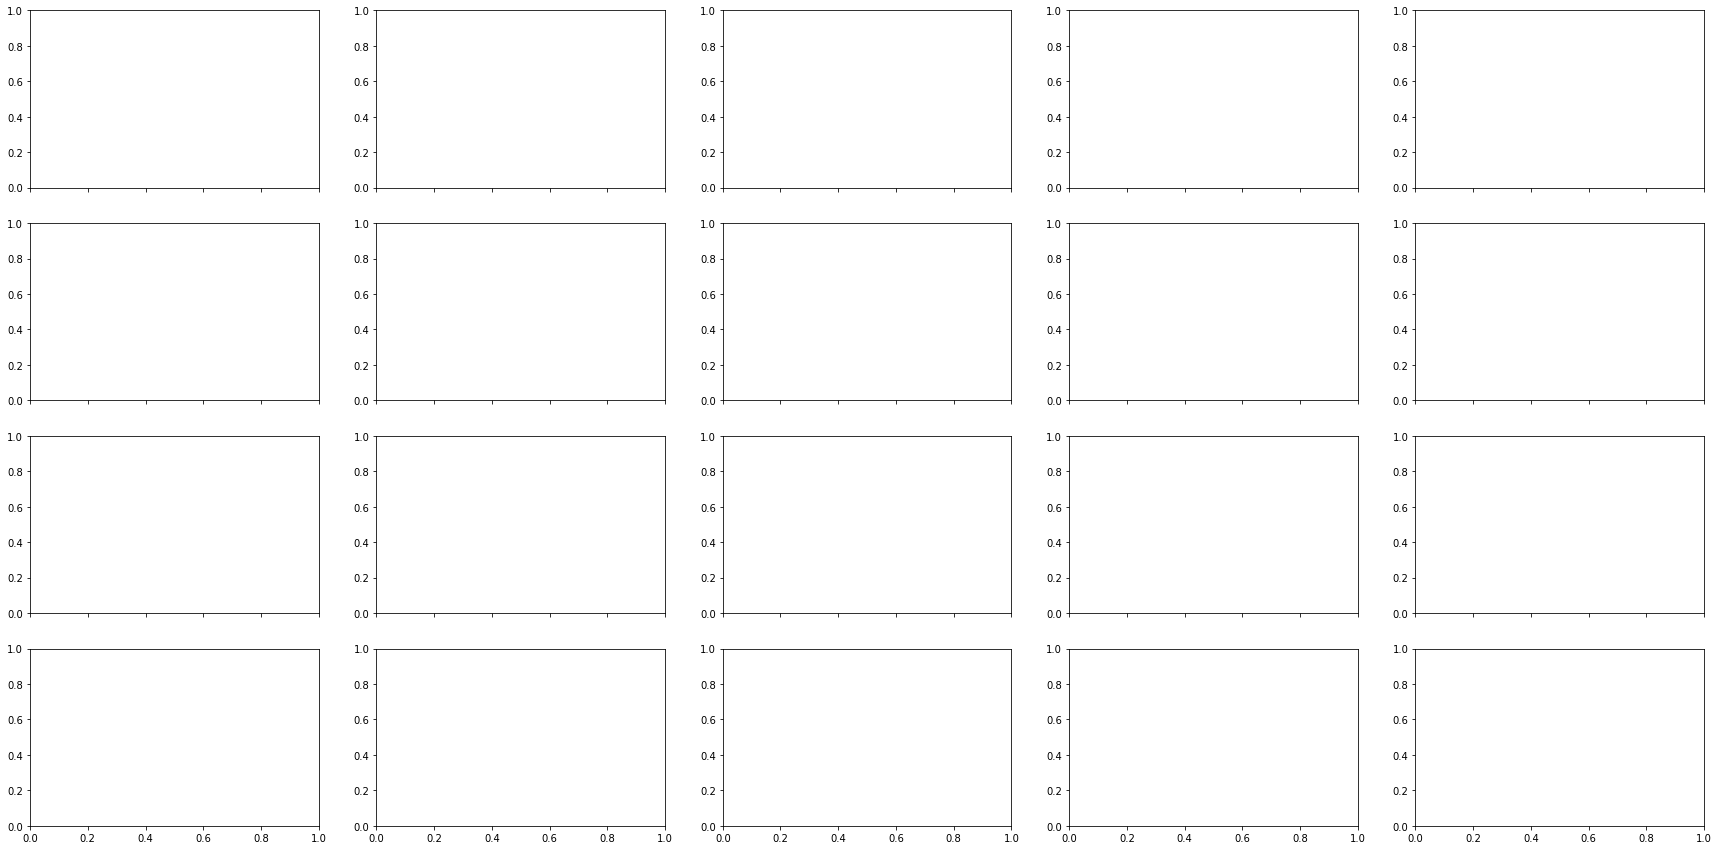

In [37]:
n_top_words = 10
tf_feature_names = cv_tfidf.get_feature_names()
plot_top_words2(lsa, tf_feature_names, n_top_words, 'Topics in LSA model')

df_topic_words_weights=pd.DataFrame(list(zip(top_features_list, weights_list)), 
                                    columns=['top_features', 'weights'])

In [39]:
#df_topic_words_weights.info()
print(weights_list)

NameError: name 'weights_list' is not defined

In [19]:
#sentiment analysis with TextBlob since I can't get gensim to work
from textblob import TextBlob

In [20]:
#Sentiment analysis using TextBlob
#See https://medium.com/swlh/simple-sentiment-analysis-for-nlp-beginners-and-everyone-else-using-vader-and-textblob-728da3dbe33d
#Load the 'article_words_str' column as a textblob.
article_blob = [TextBlob(article) for article in df_4_companies_prep['article_words_str']]
#add the sentiment metrics to the dataframe
df_4_companies_prep['tb_Sent_Pol'] = [b.sentiment.polarity for b in article_blob]
df_4_companies_prep['tb_Sent_Subj'] = [b.sentiment.subjectivity for b in article_blob]
#show dataframe
df_4_companies_prep.head(3)
#Polarity is a float in the range -1 to 1, where -1 is most negative, and 1 is most positive
#Subjectivity is a float in the range 0 to 1, where, 0 is very objective, and 1 is very subjective

,article_date,article_link-href,article_title,ticker,article_text_clean,article_text_words,article_words_nostop,article_words_str,tb_Sent_Pol,tb_Sent_Subj
0,"Apr 01, 2019",https://www.novartis.com/news/media-releases/n...,Novartis adds clinical and preclinical anti-in...,NVS,acquisition will give one clinical and two pre...,"[acquisition, will, give, one, clinical, and, ...","[acquisition, give, one, clinical, two, precli...","['acquisition', 'give', 'one', 'clinical', 'tw...",0.126201,0.489756
1,"Jun 15, 2017",https://www.novartis.com/news/media-releases/n...,Novartis' Cosentyx shows sustained improvement...,NVS,® is the first and only inhibitor to show sust...,"[®, is, the, first, and, only, inhibitor, to, ...","[®, first, inhibitor, show, sustained, spondyl...","['®', 'first', 'inhibitor', 'show', 'sustained...",0.026895,0.419697
2,"Jun 04, 2017",https://www.novartis.com/news/media-releases/n...,Novartis landmark study of Tafinlar® + Mekinis...,NVS,study is follow up to date of a and inhibitor ...,"[study, is, follow, up, to, date, of, a, and, ...","[study, date, inhibitor, combination, therapy,...","['study', 'date', 'inhibitor', 'combination', ...",0.061935,0.371997


In [21]:
df_4_companies_prep.tail()

,article_date,article_link-href,article_title,ticker,article_text_clean,article_text_words,article_words_nostop,article_words_str,tb_Sent_Pol,tb_Sent_Subj
1259,"March 19, 2019",http://ir.clovisoncology.com/investors-and-new...,Clovis Oncology Announces Presentations at 201...,CLVS,accepted highlight data from a phase investiga...,"[accepted, highlight, data, from, a, phase, in...","[accepted, highlight, data, phase, investigato...","['accepted', 'highlight', 'data', 'phase', 'in...",0.086902,0.425250
1260,"April 02, 2019",http://ir.clovisoncology.com/investors-and-new...,Clovis Oncology Announces Interim Results from...,CLVS,interim data from an investigator study in fir...,"[interim, data, from, an, investigator, study,...","[interim, data, investigator, study, first, li...","['interim', 'data', 'investigator', 'study', '...",0.085824,0.410722
1261,"January 02, 2019",http://ir.clovisoncology.com/investors-and-new...,Clovis Oncology to Present at the 37th Annual ...,CLVS,boulder business wire oncology today that its ...,"[boulder, business, wire, oncology, today, tha...","[boulder, business, wire, oncology, today, chi...","['boulder', 'business', 'wire', 'oncology', 't...",0.141414,0.436111
1262,"December 16, 2019",http://ir.clovisoncology.com/investors-and-new...,Initial Clinical Experience Reported from FAP-...,CLVS,at the international symposium on precision on...,"[at, the, international, symposium, on, precis...","[international, symposium, precision, oncology...","['international', 'symposium', 'precision', 'o...",0.102768,0.388918
1263,"February 19, 2019",http://ir.clovisoncology.com/investors-and-new...,Alkermes and Clovis Oncology Initiate Research...,CLVS,of with and to be in multiple preclinical tumo...,"[of, with, and, to, be, in, multiple, preclini...","[multiple, preclinical, tumor, boulder, alkerm...","['multiple', 'preclinical', 'tumor', 'boulder'...",0.121604,0.321791


In [22]:
#pickle this dataframe. 
with open('df_4_companies_prep_tb_sentiment.pickle', 'wb') as to_write:
    pickle.dump(df_4_companies_prep, to_write)

In [23]:
df_4_companies_prep.to_csv('df_4_companies_prep_sentiment.csv')